In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import SGDRegressor, Ridge, RANSACRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
def draw_graph(x_data, y_data, x_label):
    
    fig = plt.figure(figsize=(15, 8))
    axes = plt.gca()
    plt.xlabel(x_label)
    plt.grid(True)
    plt.ylabel('NRMSE')
    
    plt.plot(x_data, y_data)

In [3]:
def get_XY(data, number_of_features):
    X_data = []
    y_data = []
    for i in range(data.shape[0]):
        curr = list(map(int, data[i, 0].split()))
        X_data.append(curr[:number_of_features])
        y_data.append(curr[number_of_features:])
    return X_data, y_data

In [4]:
def read_data():
    
    data = pd.read_csv('resources/1.txt')
    number_of_features = int(data.columns[0])
    
    x_train_shape = int(data.iloc[data.index == 0].values[0, 0])
    
    x_train = data.iloc[data.index <= x_train_shape].values[1:]
    x_test = data.iloc[data.index > x_train_shape].values[1: ]
    
    x_data = np.vstack((x_train, x_test))
    
    x, y = get_XY(x_data, number_of_features)

    x = np.array(x)
    y = np.array(y)
    
    print(x.shape, y.shape)
    
    return x, y

In [5]:
x_data, y_data = read_data()

(1069, 610) (1069, 1)


# Метод наименьших квадратов

In [6]:
grid_mse = GridSearchCV(
    Ridge(solver='svd'),
    {'alpha': np.linspace(1000,1000000,100)},
    scoring='neg_mean_squared_error',
    cv = 10)

In [7]:
grid_mse.fit(x_data,y_data)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='svd', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([   1000.        ,   11090.90909091,   21181.81818182,
         31272.72727273,   41363.63636364,   51454.54545455,
         61545.45454545,   71636.36363636,   81727.27272727,
         9181...
        818363.63636364,  828454.54545455,  838545.45454545,
        848636.36363636,  858727.27272727,  868818.18181818,
        878909.09090909,  889000.        ,  899090.90909091,
        909181.81818182,  919272.72727273,  929363.63636364,
        939454.54545455,  949545.45454545,  959636.36363636,
        969727.27272727,  979818.18181818,  989909.09090909,
       1000000.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       

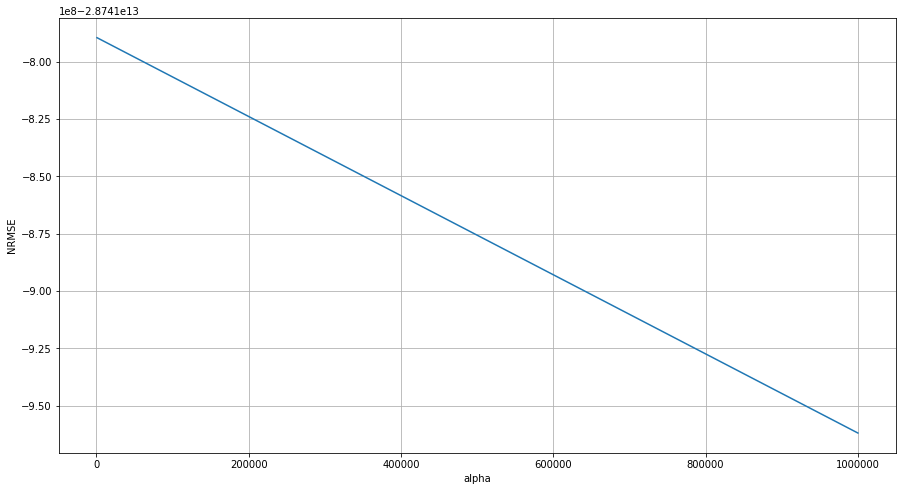

In [9]:
draw_graph(grid_mse.cv_results_['param_alpha'].data, grid_mse.cv_results_['mean_test_score'].data, 'alpha')

# Градиентный спуск (SGD)

In [35]:
parameters_grid_SGD = {
    'alpha': np.linspace(0.0001,0.01, 10),
    'eta0': np.linspace(0.000001,0.00001, 10),
    'penalty': ['l2', 'l1', 'elasticnet']
}

In [36]:
grid_SGD = GridSearchCV(
    SGDRegressor(max_iter=1000), 
    parameters_grid_SGD, 
    scoring='neg_mean_squared_error', 
    cv = 10)

In [37]:
grid_SGD.fit(x_data,y_data)

GridSearchCV(cv=10, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_sta...
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.0001, 0.0012, 0.0023, 0.0034, 0.0045, 0.0056, 0.0067, 0.0078,
       0.0089, 0.01  ]),
                         'eta0': array([1.e-06, 2.e-06, 3.e-06, 4.e-06, 5.e-06, 6.e-06, 7.e-06, 8.e-06,
       9.e-

In [39]:
grid_SGD.best_params_

{'alpha': 0.0023, 'eta0': 1e-06, 'penalty': 'elasticnet'}

In [10]:
parameters_iters = {
    'max_iter': np.linspace(50,1700, 20)
}

In [11]:
grid_SGD_iters = GridSearchCV(
    SGDRegressor(alpha = 0.0023, eta0 = 1e-06, penalty='elasticnet'), 
    parameters_iters, 
    scoring='neg_mean_squared_error', 
    cv = 10)

In [12]:
grid_SGD_iters.fit(x_data,y_data)

GridSearchCV(cv=10, error_score=nan,
             estimator=SGDRegressor(alpha=0.0023, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=1e-06, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='elasticnet',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0...
             param_grid={'max_iter': array([  50.        ,  136.84210526,  223.68421053,  310.52631579,
        397.36842105,  484.21052632,  571.05263158,  657.89473684,
        744.73684211,  831.57894737,  918.42105263, 1005.26315789,
       1092.10526316, 1178.94736842, 1265.78947368, 1352.63157895,
       1439.47368421,

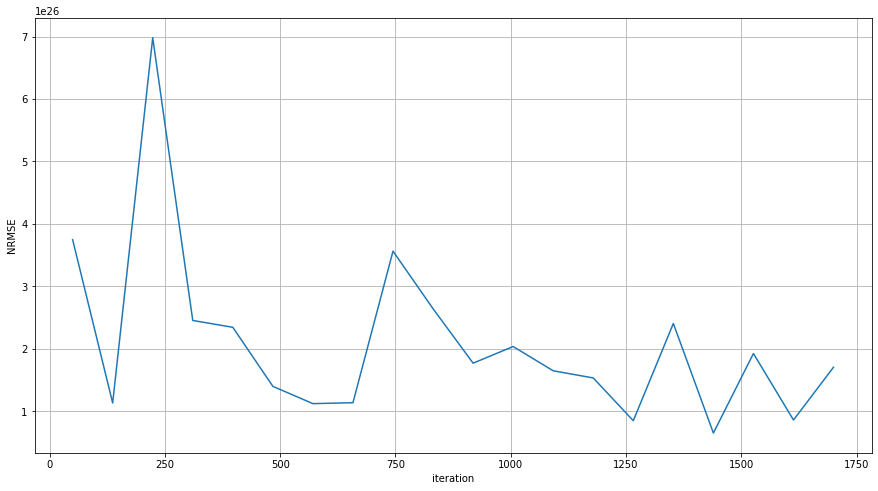

In [15]:
draw_graph(grid_SGD_iters.cv_results_['param_max_iter'].data, grid_SGD_iters.cv_results_['std_test_score'].data, 'iteration')

# RANSAC

In [16]:
parameters_RANSAC = {
    'min_samples': np.arange(50,300,10)
}

In [17]:
grid_ransac = GridSearchCV(
    RANSACRegressor(max_trials=100, loss='squared_loss'),
    parameters_RANSAC, 
    scoring='neg_mean_squared_error', 
    cv = 10)

In [18]:
grid_ransac.fit(x_data, y_data)

GridSearchCV(cv=10, error_score=nan,
             estimator=RANSACRegressor(base_estimator=None, is_data_valid=None,
                                       is_model_valid=None, loss='squared_loss',
                                       max_skips=inf, max_trials=100,
                                       min_samples=None, random_state=None,
                                       residual_threshold=None,
                                       stop_n_inliers=inf,
                                       stop_probability=0.99, stop_score=inf),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

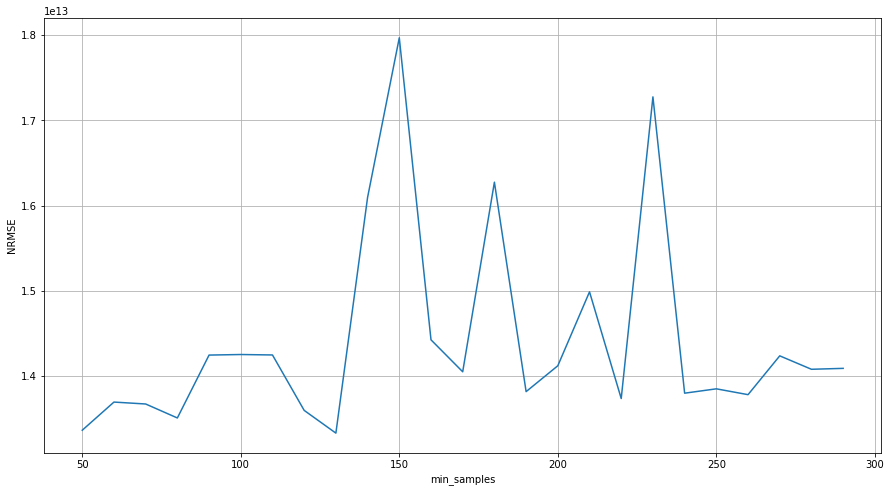

In [23]:
draw_graph(grid_ransac.cv_results_['param_min_samples'].data, grid_ransac.cv_results_['std_test_score'].data, 'min_samples')